In [30]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random
from math import sqrt


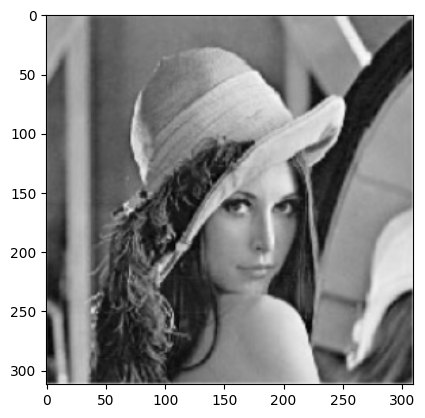

In [4]:
img = cv2.imread('../images/lena.jpg',0)
plt.imshow(img,cmap='gray')

In [5]:
def salt_pepper_noise(image):
   
    # Getting the dimensions of the image
    row , col = image.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = 50000
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        image[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    # number_of_pixels = random.randint(2000 , 3000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to black
        image[y_coord][x_coord] = 0
          
    return image

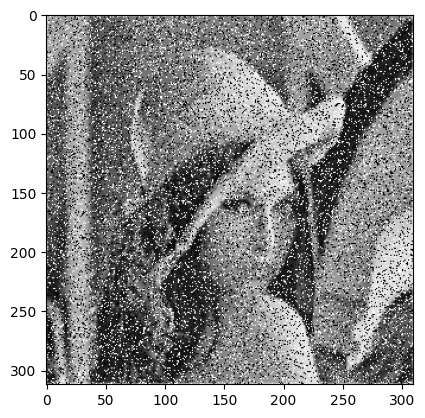

In [6]:
def salt_pepper(image, range):
        row, col = image.shape
        salt_pepper = np.random.random((row, col))*255
        pepper = salt_pepper < 0+range
        salt = salt_pepper > 255-range
        image[pepper] = 0
        image[salt] = 255
        return image

img1=salt_pepper(img,30)
plt.imshow(img1,cmap='gray')

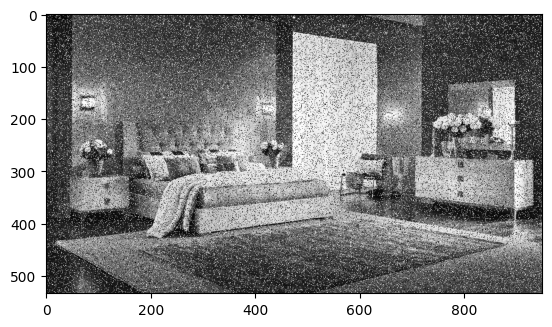

In [7]:
img = cv2.imread('../images/4.png',0)
img1=salt_pepper_noise(img)
plt.imshow(img1,cmap='gray')

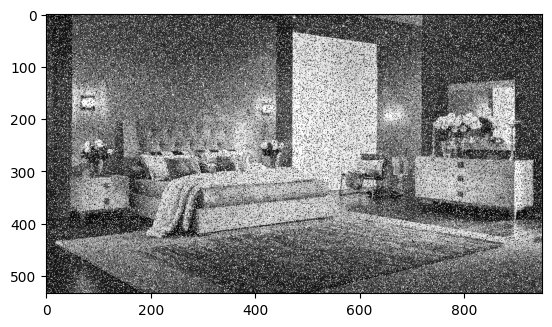

In [8]:
img = cv2.imread('../images/4.png',0)
img1=salt_pepper(img,30)
plt.imshow(img1,cmap='gray')

In [9]:
def gaussian_noise(image, range):
        row, col = image.shape
        mean = 0
        var = range 
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col))
        gauss = gauss.reshape(row, col)
        noisy = image + gauss
        return noisy

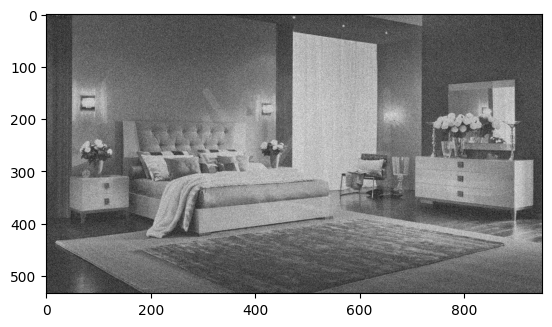

In [10]:
img = cv2.imread('../images/4.png',0)
img1=gaussian_noise(img, 500)
plt.imshow(img1,cmap='gray')

In [11]:
def uniform_noise(image, range):
        row, col = image.shape
        low = -range
        high = range
        noise = np.random.uniform(low, high, (row, col))
        noisy = image + noise
        return noisy

In [12]:
def median_filter(image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.median(image[i:i+kernel_size, j:j+kernel_size])
        return new_image

In [13]:
def average_filter(image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.mean(image[i:i+kernel_size, j:j+kernel_size])
        return new_image

In [14]:
# def getkernel(l=3, sigma=2):
   

#     ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
#     xx, yy = np.meshgrid(ax, ax)

#     kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))

#     return kernel / np.sum(kernel)

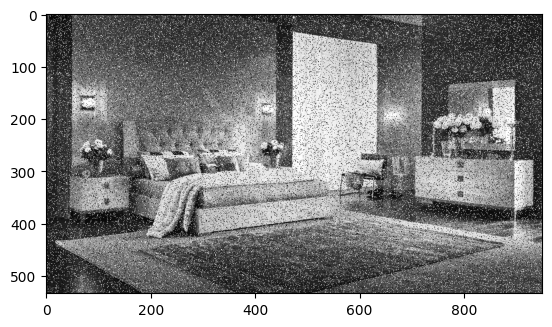

In [15]:
img = cv2.imread('../images/4.png',0)

noisedImage=salt_pepper(img, 20)
plt.imshow(noisedImage,cmap='gray')

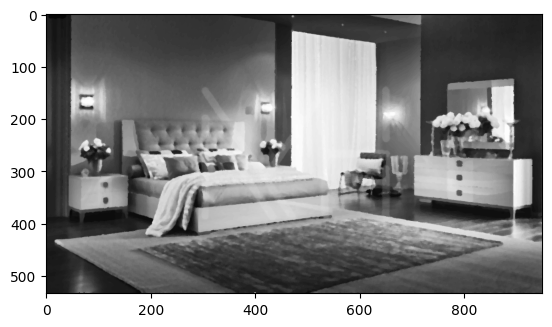

In [16]:
filteredImage=median_filter(noisedImage, 5)
plt.imshow(filteredImage,cmap='gray')

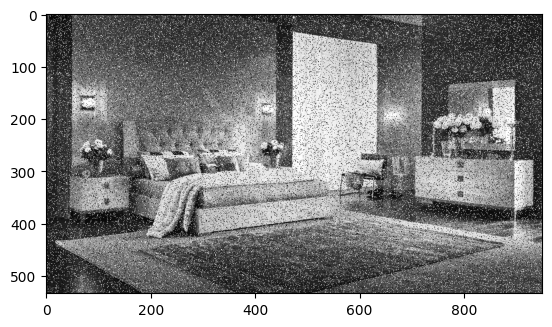

In [17]:
plt.imshow(noisedImage,cmap='gray')

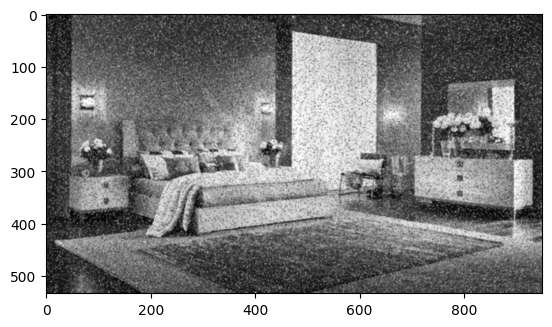

In [18]:
filteredImage=average_filter(noisedImage, 3)
plt.imshow(filteredImage,cmap='gray')

In [19]:
def getkernel(kernel_size=3, sigma=2):
    ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sigma))
    
    return kernel / np.sum(kernel)

In [20]:
def gaussian_filter(image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        sigma = 2
        # get kernel
        kernel = getkernel(kernel_size, sigma)
        # apply zero padding
        image = np.pad(image, (kernel_size//2, kernel_size//2), 'constant')
        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.sum(image[i:i+kernel_size, j:j+kernel_size]*kernel)
        return new_image

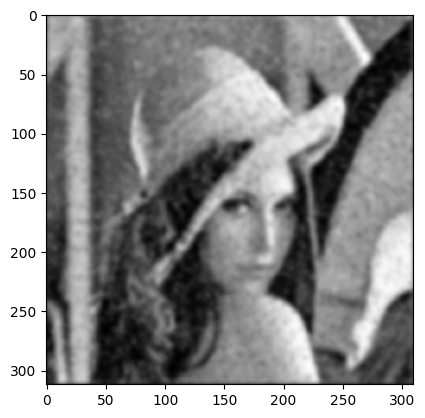

In [21]:
img = cv2.imread('../images/lena.jpg',0)
noisedImage=salt_pepper(img, 10)
filteredImage=gaussian_filter(noisedImage, 15)
plt.imshow(filteredImage,cmap='gray')

In [34]:

class Filters:
    def __init__(self):
        pass

    ######################################################################
    # Add noise to the image algorithms

    def salt_pepper_noise(self, image, range):
        row, col = image.shape
        salt_pepper = np.random.random((row, col))*255
        pepper = salt_pepper < 0+range
        salt = salt_pepper > 255-range
        image[pepper] = 0
        image[salt] = 255
        return image

    def gaussian_noise(self, image, range):
        row, col = image.shape
        mean = 0
        var = range
        sigma = var ** 0.5
        gauss = np.random.normal(mean, sigma, (row, col))
        gauss = gauss.reshape(row, col)
        noisy = image + gauss
        return noisy

    def uniform_noise(self, image, range):
        row, col = image.shape
        low = -range
        high = range
        noise = np.random.uniform(low, high, (row, col))
        noisy = image + noise
        return noisy

    ######################################################################
    # Smoothing filters algorithms

    def average_filter(self, image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))

        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.mean(
                    image[i:i+kernel_size, j:j+kernel_size])
        return new_image

    def median_filter(self, image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))

        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.median(
                    image[i:i+kernel_size, j:j+kernel_size])
        return new_image

    def gaussian_filter(self, image, kernel_size):
        row, col = image.shape
        new_image = np.zeros((row, col))
        sigma = 2

        # get kernel
        ax = np.linspace(-(kernel_size - 1) / 2.,
                         (kernel_size - 1) / 2., kernel_size)
        xx, yy = np.meshgrid(ax, ax)
        kernel = np.exp(-0.5 * (np.square(xx) +
                        np.square(yy)) / np.square(sigma))
        kernel = kernel / np.sum(kernel)

        # apply zero padding
        image = np.pad(image, (kernel_size//2, kernel_size//2), 'constant')

        # apply filter
        for i in range(row):
            for j in range(col):
                new_image[i, j] = np.sum(
                    image[i:i+kernel_size, j:j+kernel_size]*kernel)
        return new_image

    ######################################################################
    # Edge detection algorithms

    def sobel_edge_detector(self, image):
        vertical_grad_filter = np.array(
            [[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        horizontal_grad_filter = np.array(
            [[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        return self.__detect_edges_helper(image, vertical_grad_filter, horizontal_grad_filter)

    def prewitt_edge_detector(self, image):
        vertical_grad_filter = np.array(
            [[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
        horizontal_grad_filter = np.array(
            [[1, 0, -1], [1, 0, -1], [1, 0, -1]])
        return self.__detect_edges_helper(image, vertical_grad_filter, horizontal_grad_filter)
    
    def roberts_edge_detector(self, image):
        vertical_grad_filter = np.array([[0, 0, 0], [0, 1, 0], [0, 0, -1]])
        horizontal_grad_filter = np.array([[0, 0, 0], [0, 0, 1], [0, -1, 0]])
        return self.__detect_edges_helper(image, vertical_grad_filter, horizontal_grad_filter)

    def __detect_edges_helper(self, image, vertical_grad_filter=None, horizontal_grad_filter=None):
        # convert to grayscale image
        image = np.dot(image, [1, 1, 1])//3

        # normalize the image
        image = image/255

        # kernel width initialization
        kernel_width = vertical_grad_filter.shape[0]//2

        # initialize the gradient image
        gradient = np.zeros(image.shape)

        # pad the image
        image = np.pad(image, kernel_width, 'constant')

        for i in range(kernel_width, image.shape[0] - kernel_width):
            for j in range(kernel_width, image.shape[1] - kernel_width):

                # obtain the horizontal gradients
                x = image[i - kernel_width: i + kernel_width +
                          1, j - kernel_width: j + kernel_width + 1]
                x = x.flatten() * vertical_grad_filter.flatten()
                sum_x = x.sum()

                # obtain the vertical gradients
                y = image[i - kernel_width: i + kernel_width +
                          1, j - kernel_width: j + kernel_width + 1]
                y = y.flatten() * horizontal_grad_filter.flatten()
                sum_y = y.sum()

                # calculate the gradient
                gradient[i - kernel_width][j -
                                           kernel_width] = sqrt(sum_x**2 + sum_y**2)

        return gradient
    

    def canny_edge_detector(self, image):
        # convert to grayscale image
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # normalize the image
        image = image/255

        # apply gaussian filter
        image = self.gaussian_filter(image, 5)

        # calculate the gradients
        vertical_grad_filter = np.array(
            [[1, 0, -1], [2, 0, -2], [1, 0, -1]])
        horizontal_grad_filter = np.array(
            [[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
        vertical_grad = self.__detect_edges_helper(
            image, vertical_grad_filter, horizontal_grad_filter)
        horizontal_grad = self.__detect_edges_helper(
            image, horizontal_grad_filter, vertical_grad_filter)

        # calculate the gradient magnitude and direction
        gradient_magnitude = np.sqrt(
            np.square(vertical_grad) + np.square(horizontal_grad))
        gradient_direction = np.arctan2(vertical_grad, horizontal_grad)

        # non-maximum suppression
        gradient_magnitude = self.__non_maximum_suppression(
            gradient_magnitude, gradient_direction)

        # double threshold
        high_threshold_ratio = 0.09
        low_threshold_ratio = 0.05
        high_threshold = gradient_magnitude.max() * high_threshold_ratio
        low_threshold = high_threshold * low_threshold_ratio

        strong_i, strong_j = np.where(gradient_magnitude >= high_threshold)
        zeros_i, zeros_j = np.where(gradient_magnitude < low_threshold)
        weak_i, weak_j = np.where(
            (gradient_magnitude <= high_threshold) & (gradient_magnitude >= low_threshold))

        # initialize the output image
        output_image = np.zeros(gradient_magnitude.shape)

        # strong edges
        output_image[strong_i, strong_j] = 1

        # weak edges
        output_image[weak_i, weak_j] = 0.5

        # hysteresis
        output_image = self.__hysteresis(
            output_image, weak_i, weak_j, strong_i, strong_j)

        return output_image

    def __hysteresis(self, image, weak_i, weak_j, strong_i, strong_j):
        for i, j in zip(weak_i, weak_j):
            try:
                if ((image[i + 1, j - 1] == 1) or (image[i + 1, j] == 1) or (image[i + 1, j + 1] == 1) or
                        (image[i, j - 1] == 1) or (image[i, j + 1] == 1) or
                        (image[i - 1, j - 1] == 1) or (image[i - 1, j] == 1) or (image[i - 1, j + 1] == 1)):
                    image[i, j] = 1
            except IndexError as e:
                pass
        return image


In [35]:
from math import sqrt

filterr = Filters()

img=cv2.imread('../images/02.jpeg')
imgg=filterr.canny_edge_detector(img)
plt.imshow(imgg,cmap='gray')

ValueError: shapes (300,332) and (3,) not aligned: 332 (dim 1) != 3 (dim 0)